<a href="https://colab.research.google.com/github/keshav3010/Diabetic-Retinopathy-Detection/blob/master/testcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
COLAB = True
print("Note: using Google CoLab")
%tensorflow_version 1.14

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Note: using Google CoLab
`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `1.14`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from sklearn.externals import joblib
from keras.layers import Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras import backend as K
import os
import cv2
import matplotlib.pyplot as plt
import pickle

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [0]:
from subprocess import check_output
print(check_output(["ls", "../content/drive/My Drive/aptos2019-blindness-detection"]).decode("utf8"))


sample_submission.csv
test.csv
test_images
train.csv
train_images
train_images_new.pickle
train_labels_new.pickle



In [0]:
train = pd.read_csv("../content/drive/My Drive/aptos2019-blindness-detection/train.csv")
test  = pd.read_csv("../content/drive/My Drive/aptos2019-blindness-detection/test.csv")

In [0]:
train.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [0]:
from sklearn.utils import shuffle

x = np.array(train['id_code'])
y = np.array( train['diagnosis'])
print(x,y)
print(len(x))

['000c1434d8d7' '001639a390f0' '0024cdab0c1e' ... 'ffcf7b45f213'
 'ffd97f8cd5aa' 'ffec9a18a3ce'] [2 4 1 ... 2 0 2]
3662


In [0]:
baseDir= "../content/drive/My Drive/aptos2019-blindness-detection/train_images/"


l=[]
for i in range(len(x)):
    image = cv2.imread(baseDir+ str(x[i])+".png", cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(image, (200,200))
    resized_image= cv2.addWeighted ( resized_image,4, cv2.GaussianBlur( resized_image , (0,0) , 20) ,-4 ,128)
    l.append([resized_image, y[i]])
    #cv2.imwrite(baseDir + str(x[i])+".png", resized_image)
    print(i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [0]:
baseDir= "../content/drive/My Drive/test/"
s = os.listdir(baseDir)

m=[]
for i in s:
    image = cv2.imread(baseDir+ str(i), cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(image, (200,200))
    resized_image= cv2.addWeighted ( resized_image,4, cv2.GaussianBlur( resized_image , (0,0) , 20) ,-4 ,128)
    m.append(resized_image)
    print(i)
print(m)

0a3202889f4d.png
0a1076183736.png
0bf37ca3156a.png
0c55d58bebaf.png
0c76fd494af6.png
0c917c372572.png
[array([[ 96,  92,  92, ...,  44,  44,  48],
       [ 92,  92,  92, ...,  44,  44,  48],
       [ 92,  92,  92, ...,  44,  48,  44],
       ...,
       [100, 104, 100, ...,  72,  72,  72],
       [100, 104, 104, ...,  72,  72,  72],
       [104, 100, 100, ...,  72,  68,  72]], dtype=uint8), array([[108, 116, 112, ...,  92,  96,  96],
       [112, 112, 112, ...,  96,  96,  96],
       [112, 112, 112, ...,  96, 100,  96],
       ...,
       [128, 124, 128, ..., 116, 112, 116],
       [128, 124, 124, ..., 112, 116, 116],
       [124, 124, 124, ..., 116, 116, 116]], dtype=uint8), array([[ 88,  96,  88, ...,  96,  96,  96],
       [ 88,  96,  92, ...,  96,  96, 100],
       [ 96,  92,  92, ...,  96, 100, 100],
       ...,
       [ 64,  60,  64, ...,  68,  64,  64],
       [ 60,  60,  68, ...,  68,  68,  60],
       [ 64,  64,  60, ...,  64,  64,  64]], dtype=uint8), array([[ 96,  96,  96, .

In [0]:
train_images = []
train_labels = []

for features in m:
    train_images.append(features)
train_images = np.array(train_images)

train_images.shape
pickle_out = open("../content/drive/My Drive/aptos2019-blindness-detection/test_images_new.pickle", "wb")
pickle.dump(train_images , pickle_out)

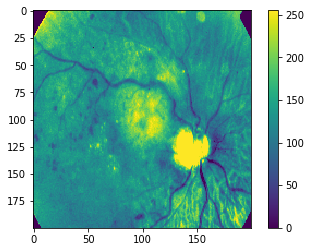

2


In [0]:
z = 810
plt.figure()
plt.imshow(train_images[z])
plt.colorbar()
plt.show()
print(train_labels[z])

In [0]:
pickle_out = open("../content/drive/My Drive/aptos2019-blindness-detection/train_images_new.pickle", "wb")
pickle.dump(train_images , pickle_out)
pickle_out.close()

NameError: ignored

In [0]:
pickle_out = open("../content/drive/My Drive/aptos2019-blindness-detection/train_labels_new.pickle", "wb")
pickle.dump(train_labels , pickle_out)
pickle_out.close()

In [0]:
train_labels = pickle.load(open("../content/drive/My Drive/aptos2019-blindness-detection/train_labels_new.pickle", "rb"))

FileNotFoundError: ignored

In [0]:
train_labels


array([2, 4, 1, ..., 2, 0, 2])